<a href="https://colab.research.google.com/github/DanyelMorales/MLLearneerRepo/blob/main/02_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -o "train-images-idx3-ubyte.gz" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/train-images-idx3-ubyte.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  8484k      0  0:00:01  0:00:01 --:--:-- 8491k


In [2]:
!curl -o "t10k-images-idx3-ubyte.gz" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/t10k-images-idx3-ubyte.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0  2609k      0 --:--:-- --:--:-- --:--:-- 2609k


In [3]:
!curl -o "train-labels-idx1-ubyte.gz" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/train-labels-idx1-ubyte.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0  66038      0 --:--:-- --:--:-- --:--:-- 66089


In [4]:
!curl -o "t10k-labels-idx1-ubyte.gz" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/t10k-labels-idx1-ubyte.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0   9036      0 --:--:-- --:--:-- --:--:--  9047


In [5]:
!curl -o "mnist.py" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/lib/mnist.py"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1205  100  1205    0     0   2974      0 --:--:-- --:--:-- --:--:--  2975


In [6]:
!curl -o "digit_classifier.py" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/lib/digit_classifier.py"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1481  100  1481    0     0   3181      0 --:--:-- --:--:-- --:--:--  3184


In [7]:
from mnist import prepend_bias, load_images, load_labels,one_hot_encode
import digit_classifier

In [8]:

X_train = prepend_bias(load_images("train-images-idx3-ubyte.gz"))
X_test = prepend_bias(load_images("t10k-images-idx3-ubyte.gz"))
Y_train = one_hot_encode(load_labels("train-labels-idx1-ubyte.gz"))
Y_test = (load_labels("t10k-labels-idx1-ubyte.gz"))

In [9]:
w = digit_classifier.train(X_train,Y_train,X_test,Y_test, iterations=200, lr=1e-5)

0 - Loss: 0.6931471805599453, 
 88.65%
1 - Loss: 0.6329712674925422, 
 88.65%
2 - Loss: 0.4041504120613409, 
 88.65%
3 - Loss: 0.20740137552095117, 
 88.65%
4 - Loss: 0.10475739758236242, 
 88.65%
5 - Loss: 0.084065844259969, 
 88.65%
6 - Loss: 0.08017763379914089, 
 88.65%
7 - Loss: 0.07779278786107958, 
 88.65%
8 - Loss: 0.0757192265712811, 
 88.65%
9 - Loss: 0.07385842309425815, 
 88.65%
10 - Loss: 0.07217526698365141, 
 88.65%
11 - Loss: 0.0706439388687286, 
 88.65%
12 - Loss: 0.06924364639852244, 
 88.65%
13 - Loss: 0.06795734081897782, 
 88.65%
14 - Loss: 0.06677088993872657, 
 88.65%
15 - Loss: 0.06567246994486708, 
 88.65%
16 - Loss: 0.06465210531601653, 
 88.65%
17 - Loss: 0.06370131554251553, 
 88.65%
18 - Loss: 0.06281284058480352, 
 88.65%
19 - Loss: 0.061980425227391056, 
 88.65%
20 - Loss: 0.06119864802861201, 
 88.65%
21 - Loss: 0.0604627844122555, 
 88.65%
22 - Loss: 0.059768696163828086, 
 88.65%
23 - Loss: 0.0591127415404373, 
 88.65%
24 - Loss: 0.05849170161493934, 


In [10]:
digit_classifier.test(X_test, Y_test, w)

Success: 8865/10000 88.65%


In [22]:
!curl -o "img_8.png" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/8_handwritten.png"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12299  100 12299    0     0  56607      0 --:--:-- --:--:-- --:--:-- 56677


In [110]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def load_image(file):
  test_image = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
  img_resized = cv2.resize(test_image, (28, 28))
  img_resized = cv2.bitwise_not(img_resized)
  plt.imshow(img_resized, cmap="Greys")
  return img_resized

In [111]:
# prompt: cv2 image to np buffer

def cv2_to_np_buffer(img):
  np_img = np.asarray(img)
  np_img = np.expand_dims(np_img, axis=0)
  print(np_img.shape)
  return np_img


(1, 28, 28)


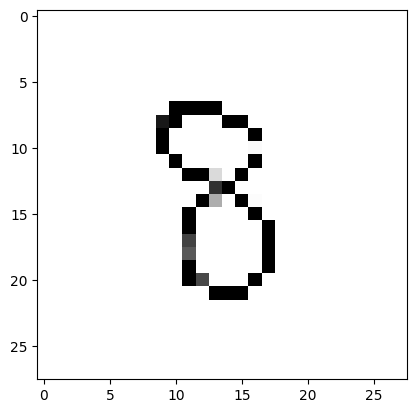

In [112]:
number_8 = cv2_to_np_buffer(load_image("./img_8.png"))

In [103]:
number_8= number_8.reshape(1,28*28)

In [109]:
number_8.shape

(1, 784)

In [107]:
digit_classifier.classify(number_8, w)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 785 is different from 784)